<a href="https://colab.research.google.com/github/HarshiniR4/Fall-2023-NYU-AI-hr2547/blob/assignment3/Assignment%203/Train_Drone_Detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3 Task 1**
Harshini Raju


## Setup your development environment and store the test videos locally

In [44]:
# Pip install method (recommended)
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.7/78.2 GB disk)


In [45]:
import os
from distutils.dir_util import copy_tree

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Dataset Loading**

Dataset Utilised- [YOLO Drone Detection Dataset](https://www.kaggle.com/datasets/muki2003/yolo-drone-detection-dataset/)

The training of the model was done in Kaggle notebook to utilise the dataset and GPU offered by Kaggle and remove hassles.

In [ ]:
from PIL import Image
import os

input_folder = "/kaggle/working/temp2/"


# Iterate over all files in the input folder
for filename in os.listdir(input_folder):

    # Check if the file is a JPEG image
    if  filename.endswith(".JPEG") or filename.endswith(".jpeg"):

        # Try to open the file as an image and check for errors
        filepath = os.path.join(input_folder,filename)
        try:

            with Image.open(filepath) as img:
                img.verify()
        except Exception as e:
            print(f"Deleting {filename} due to error: {e}")

            # Delete the JPEG file
            os.remove(os.path.join(input_folder, filename))

            # Delete the corresponding TXT file
            txt_filename = os.path.splitext(filename)[0] + ".txt"
            txt_filepath = os.path.join(input_folder, txt_filename)
            if os.path.exists(txt_filepath):
                os.remove(txt_filepath)


In [ ]:
import os
import shutil

source_folder = "/kaggle/working/temp2/"
image_folder = "/kaggle/working/temp/drone_dataset/train/images/"
label_folder = "/kaggle/working/temp/drone_dataset/train/labels/"

for filename in os.listdir(source_folder):
    if filename.endswith(".JPEG") or filename.endswith(".jpeg") :
        shutil.move(os.path.join(source_folder, filename), os.path.join(image_folder, filename))
    elif filename.endswith(".txt"):
        shutil.move(os.path.join(source_folder, filename), os.path.join(label_folder, filename))


In [ ]:
import shutil
shutil.rmtree("/kaggle/working/temp2")

In [ ]:
!zip -r yolo_drone_dataset.zip "/kaggle/working/"

In [ ]:
from IPython.display import FileLink
FileLink(r'yolo_drone_dataset.zip')

/kaggle/working/yolo_drone_dataset.zip

In [ ]:
# Create configuration
CONFIG = """
# train and val datasets (image directory or *.txt file with image paths)
train: /kaggle/working/temp/drone_dataset/train/
val: /kaggle/working/temp/drone_dataset//valid/

# number of classes
nc: 1

# class names
names: ['Drone']
"""

with open("data.yaml", "w") as f:
    f.write(CONFIG)


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!wandb disabled

/bin/bash: wandb: command not found


In [ ]:
HOME = "/kaggle/working/"
!yolo task=detect mode=train model=yolov8s.pt data={HOME}/data.yaml epochs=20 imgsz=640 workers=8 batch=16 project="drone_detection" device=0,1

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 120MB/s]
New https://pypi.org/project/ultralytics/8.0.208 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working//data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=drone_detection, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=Fals

In [ ]:
!ls /kaggle/working/drone_detection/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch3140.jpg
R_curve.png					   train_batch3141.jpg
args.yaml					   train_batch3142.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1699555028.2f4e5a9e3176.153.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


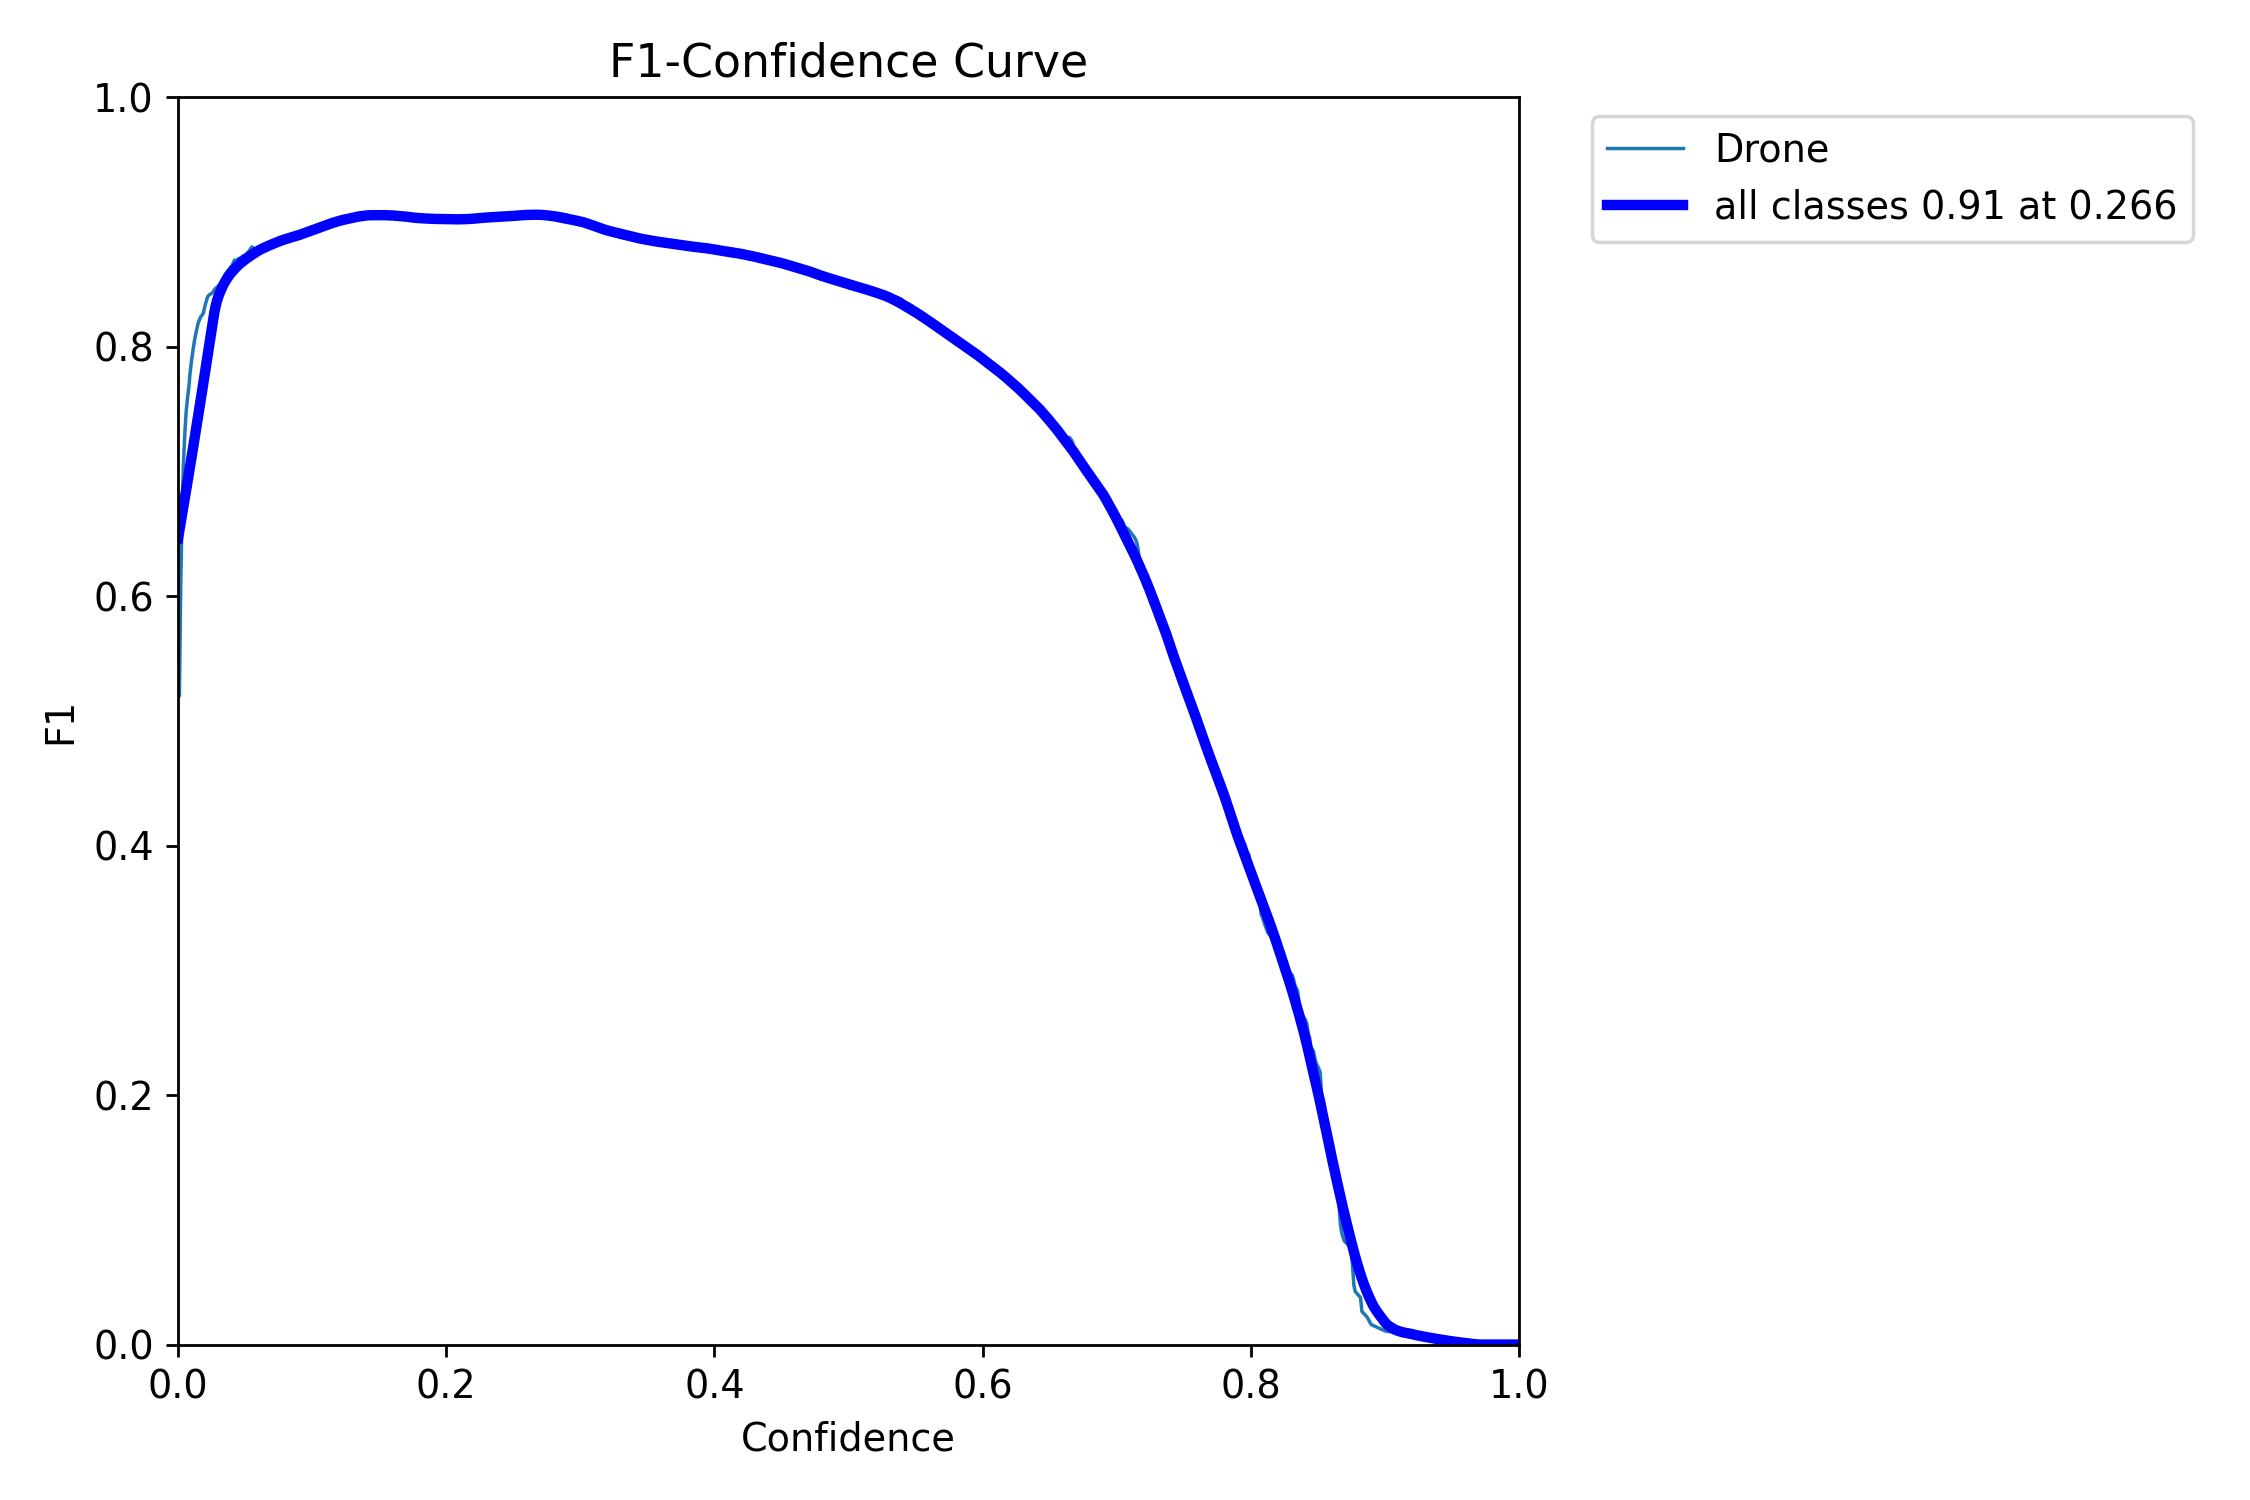

In [ ]:
directory = '/kaggle/working/drone_detection/train/'
files = os.listdir(directory)

from IPython import display
display.Image(filename=f'{HOME}/drone_detection/train/F1_curve.png', width=600)

In [ ]:
#continue training with best pt
!yolo train model='/kaggle/working/drone_detection/train/weights/best.pt' data={HOME}/data.yaml epochs=5 imgsz=640 workers=8 batch=20 project="drone_detection" device=0,1

New https://pypi.org/project/ultralytics/8.0.208 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=/kaggle/working/drone_detection/train/weights/best.pt, data=/kaggle/working//data.yaml, epochs=5, patience=50, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=drone_detection, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, 

In [ ]:
#continue training with last pt
!yolo train model='/kaggle/working/drone_detection/train/weights/last.pt' data={HOME}/data.yaml epochs=5 imgsz=640 workers=8 batch=20 project="drone_detection" device=0,1

New https://pypi.org/project/ultralytics/8.0.208 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=/kaggle/working/drone_detection/train/weights/last.pt, data=/kaggle/working//data.yaml, epochs=5, patience=50, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=drone_detection, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, 

In [ ]:
#continue training with best pt
!yolo train model='/kaggle/working/drone_detection/train2/weights/best.pt' data={HOME}/data.yaml epochs=5 imgsz=640 workers=8 batch=20 project="drone_detection" device=0,1

New https://pypi.org/project/ultralytics/8.0.208 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=/kaggle/working/drone_detection/train2/weights/best.pt, data=/kaggle/working//data.yaml, epochs=5, patience=50, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=drone_detection, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None,

In [ ]:
import os

directory = '/kaggle/working/drone-detection'
files = os.listdir(directory)

In [ ]:
!yolo task=detect mode=val model={HOME}/drone_detection/train3/weights/best.pt data={HOME}/data.yaml

Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /kaggle/working/temp/drone_dataset/valid/labels.cache... 347 image
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        347        369      0.913      0.883      0.943      0.584
Speed: 0.6ms preprocess, 6.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=predict model='/kaggle/working/drone_detection/train3/weights/best.pt' source='/kaggle/working/drone-detection/DataSets/Drones/testImages/360.jpg' show=True imgsz=640


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/1 /kaggle/working/drone-detection/DataSets/Drones/testImages/360.jpg: 480x640 1 Drone, 25.9ms
Speed: 3.5ms preprocess, 25.9ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


## **Test the Model**

ranqd


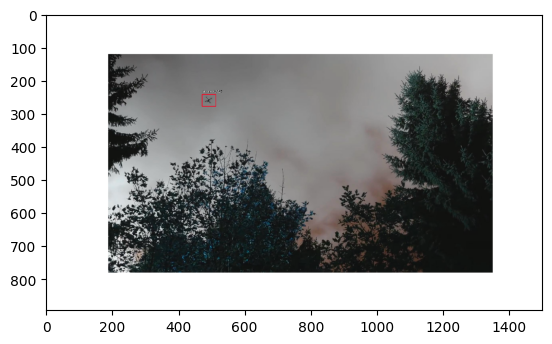

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2


# Load the image
img = cv2.imread('/content/drive/MyDrive/kaggle/working/drone-detection/screenshots/drone-test-4.png')

# Plot the image
plt.imshow(img)

def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)

def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}
  #Define colors
  if colors == []:
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]

  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
    cv2_imshow(image) #if used in Colab
  else :
    cv2.imshow("image",image) #if used in Python
print("ranqd")